In [11]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_excel('cars_data.xlsx')

In [13]:
#display head of data
df.head()

,Unnamed: 0,car_brand,car_name,manufacturing_year,location,fuel_type,kilometers_driven,number_of_owners,price
0,0,Maruti Suzuki»,Celerio»,2016,Kolkata,Petrol,45386,First,3.29 Lakh
1,1,Honda»,Mobilio»,2015,Pune,Petrol,42492,First,5.75 Lakh
2,2,Maruti Suzuki»,Swift»,2009,Hyderabad,Petrol,69298,First,3.11 Lakh
3,3,Honda»,City»,2016,Delhi,Petrol,40138,Second,5.75 Lakh
4,4,Ford»,Ecosport»,2013,Mangalore,Diesel,21871,Second,6.25 Lakh


In [14]:
#dropping uneccessory columns 
df.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
df.shape

(5024, 8)

In [16]:
#replacig '-' values with nan 
df= df.replace('-',np.nan)
df.head()

,car_brand,car_name,manufacturing_year,location,fuel_type,kilometers_driven,number_of_owners,price
0,Maruti Suzuki»,Celerio»,2016,Kolkata,Petrol,45386.0,First,3.29 Lakh
1,Honda»,Mobilio»,2015,Pune,Petrol,42492.0,First,5.75 Lakh
2,Maruti Suzuki»,Swift»,2009,Hyderabad,Petrol,69298.0,First,3.11 Lakh
3,Honda»,City»,2016,Delhi,Petrol,40138.0,Second,5.75 Lakh
4,Ford»,Ecosport»,2013,Mangalore,Diesel,21871.0,Second,6.25 Lakh


In [17]:
#checking for null values
df.isnull().sum()

car_brand             1
car_name              1
manufacturing_year    1
location              1
fuel_type             1
kilometers_driven     1
number_of_owners      1
price                 1
dtype: int64

In [18]:
#checking value counts for car names
df['price'].nunique()

636

In [19]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'Lakh' in x:
        if len(x) > 1:
            return float(x.replace('Lakh', '')) * 100000
        return 100000

df['price'] = df['price'].apply(value_to_float)

In [20]:
#filling the null  value with median 
df['kilometers_driven'].fillna(df['kilometers_driven'].median(),inplace=True)
df['price'].fillna(df['price'].median(),inplace=True)

In [21]:
#filling null values using mode because the are objects
df['car_brand'].fillna(df['car_brand'].mode()[0],inplace=True)
df['car_name'].fillna(df['car_name'].mode()[0],inplace=True)
df['manufacturing_year'].fillna(df['manufacturing_year'].mode()[0],inplace=True)
df['location'].fillna(df['location'].mode()[0],inplace=True)
df['fuel_type'].fillna(df['fuel_type'].mode()[0],inplace=True)
df['number_of_owners'].fillna(df['number_of_owners'].mode()[0],inplace=True)

In [22]:
#checking for null values
df.isnull().sum()

car_brand             0
car_name              0
manufacturing_year    0
location              0
fuel_type             0
kilometers_driven     0
number_of_owners      0
price                 0
dtype: int64

In [23]:
df.shape

(5024, 8)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024 entries, 0 to 5023
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_brand           5024 non-null   object 
 1   car_name            5024 non-null   object 
 2   manufacturing_year  5024 non-null   object 
 3   location            5024 non-null   object 
 4   fuel_type           5024 non-null   object 
 5   kilometers_driven   5024 non-null   float64
 6   number_of_owners    5024 non-null   object 
 7   price               5024 non-null   float64
dtypes: float64(2), object(6)
memory usage: 314.1+ KB


<AxesSubplot:>

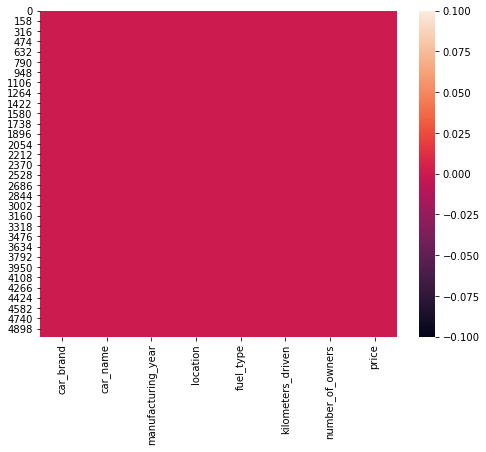

In [25]:
#making heatmap for null values
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

the dataset is free of null values

In [26]:
#converting the data to the nominal df
nominal_df=df[['car_brand','car_name','manufacturing_year','location','fuel_type','number_of_owners']].copy()

In [27]:
nominal_df=df

In [28]:
df.shape

(5024, 8)

In [29]:
#checking value counts for car brands
df['car_brand'].value_counts()

Maruti Suzuki»       1091
Hyundai»              869
Honda»                443
Toyota»               422
Mercedes-Benz»        359
Mahindra»             283
Ford»                 246
BMW»                  203
Volkswagen»           185
Audi»                 176
Renault»              134
Skoda»                121
Tata»                 106
Kia»                   56
Nissan»                53
Land Rover»            49
MG»                    41
Jeep»                  31
Chevrolet»             30
Jaguar»                24
Porsche»               22
Volvo»                 20
MINI»                  16
Datsun»                12
Fiat»                  11
Ssangyong»              9
Mitsubishi»             7
Isuzu»                  2
Mahindra-Renault»       1
Lexus»                  1
Bentley»                1
Name: car_brand, dtype: int64

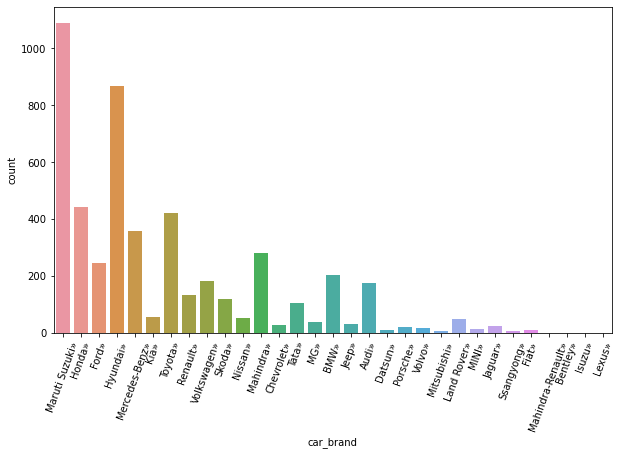

In [30]:
#making countplot for carbrands 
plt.figure(figsize=(10,6))
sns.countplot(df['car_brand'])
plt.xticks(rotation=70);

we can clearly see the market is demanding the maruti, hyundai car. mostly these brands are on sale and honda,toyota, mahindra have average contribution. lexus,ishuzu,fiat are very rarely comes on sale.

In [31]:
#checking value counts for car names
df['car_name'].value_counts()

Innova»          189
City»            152
Wagon R»         150
Swift»           149
Grand i10»       138
                ... 
XJ»                1
RS5»               1
Sail Sedan»        1
Aveo U-Va»         1
Land Cruiser»      1
Name: car_name, Length: 224, dtype: int64

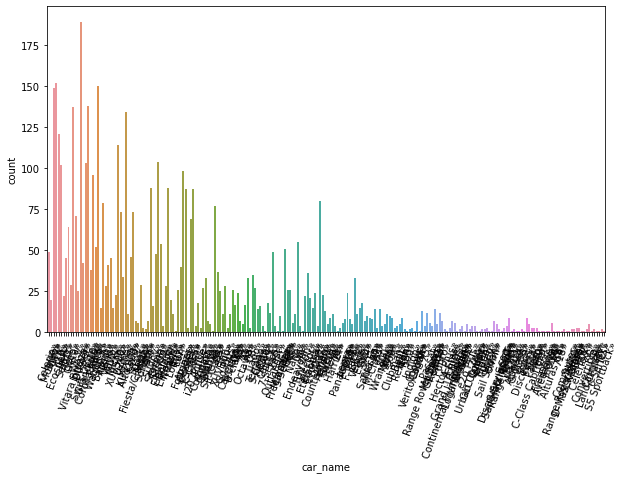

In [32]:
#making countplot for carbrands 
plt.figure(figsize=(10,6))
sns.countplot(df['car_name'])
plt.xticks(rotation=70);

we can see there are maximum innova, city, wagonr, shift, grand, xuv etc are on sale. some models like baleno, i20, vitara brizza, have average numbers of sale. and also some types of car available who have only one car available for sale.

In [33]:
#checking value counts for car names
df['manufacturing_year'].value_counts()

2016    656
2017    645
2018    613
2015    557
2014    450
2013    422
2019    391
2012    320
2011    256
2020    208
2010    144
2009    100
2008     91
2021     83
2007     40
2006     20
2004     10
2005     10
2002      4
2000      2
1999      1
2003      1
Name: manufacturing_year, dtype: int64

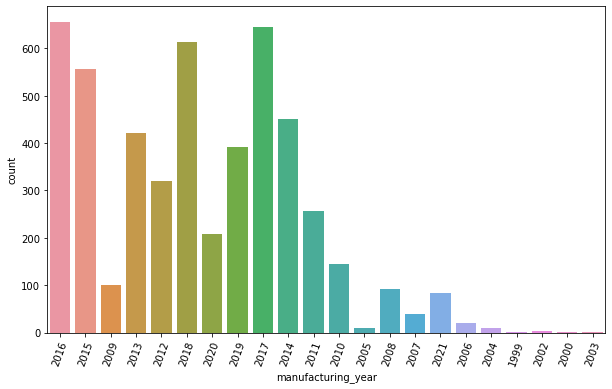

In [34]:
#making countplot for carbrands 
plt.figure(figsize=(10,6))
sns.countplot(df['manufacturing_year'])
plt.xticks(rotation=70);

most of the cars are 4-6 years old those manufacturing years are between 2013 to 2018. very few cars of 1999 to 2004 are on sales maybe the reason is govt ban the 20 years old cars.

In [35]:
df.columns

Index(['car_brand', 'car_name', 'manufacturing_year', 'location', 'fuel_type',
       'kilometers_driven', 'number_of_owners', 'price'],
      dtype='object')

In [36]:
#checking value counts for car names
df['location'].value_counts()

Delhi                 965
Mumbai                904
Bangalore             554
Pune                  387
Hyderabad             280
Ahmedabad             222
Chennai               217
Kolkata               200
Coimbatore            152
Lucknow               121
Thane                 115
Navi Mumbai            97
Gurgaon                79
Jaipur                 71
Kanpur                 70
Ghaziabad              63
Tiruchirappalli        55
Bhubaneswar            37
Mohali                 32
Indore                 32
Aurangabad             31
Noida                  28
Bhopal                 28
Raipur                 28
Faridabad              26
Mangalore              23
Jalandhar              20
Nashik                 18
Agra                   16
Ranchi                 16
Chandigarh             11
Kochi                  11
Patna                  10
Dehradun                9
Zirakpur                9
Surat                   9
Kottayam                9
Akola                   8
Meerut      

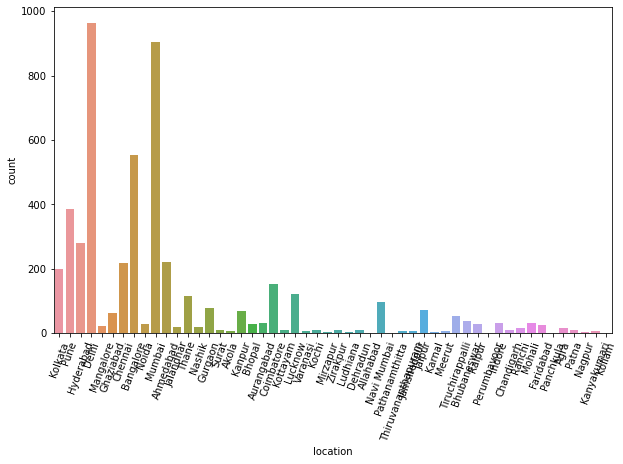

In [37]:
#making countplot for carbrands 
plt.figure(figsize=(10,6))
sns.countplot(df['location'])
plt.xticks(rotation=70);

we can see most of the cars are from delhi, mumbai, banglore which comes for sale. than pune, ahemdabad, hyedrabad and chennai having the average nnumbers of car for sale than some cities have very minium numbers of car which are on sales maybe there are people oftenly uses car these cities are allahabad, kollam, karnal etc

In [38]:
#checking value counts for car names
df['fuel_type'].value_counts()

Petrol      2493
Diesel      2460
CNG           50
Hybrid         9
LPG            8
Electric       4
Name: fuel_type, dtype: int64

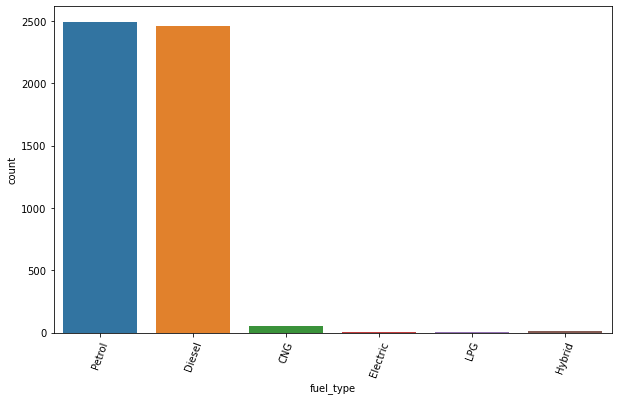

In [39]:
#making countplot for carbrands 
plt.figure(figsize=(10,6))
sns.countplot(df['fuel_type'])
plt.xticks(rotation=70);

maximum petrol and diesel cars of the dataset are on sales. maybe in india people choose petrol and diesel car varients. after diesel and petrol cng cars are comes on sale. very few electric, LPG and hybrid cars are used in india

In [40]:
#checking value counts for car names
df['number_of_owners'].value_counts()

First               4105
Second               815
Third                 79
UnRegistered Car      15
Fourth                10
Name: number_of_owners, dtype: int64

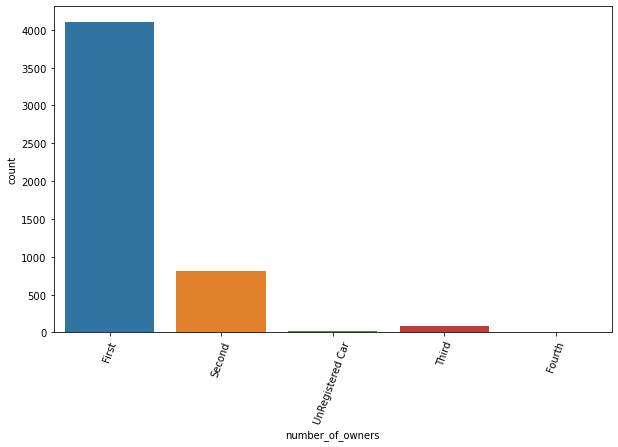

In [41]:
#making countplot for carbrands 
plt.figure(figsize=(10,6))
sns.countplot(df['number_of_owners'])
plt.xticks(rotation=70);

most of car in the dataset have only one owner right now. and some car like 15% cars have 2 owners before it comes for sale than third and fourth.

In [42]:
df.head()

,car_brand,car_name,manufacturing_year,location,fuel_type,kilometers_driven,number_of_owners,price
0,Maruti Suzuki»,Celerio»,2016,Kolkata,Petrol,45386.0,First,329000.0
1,Honda»,Mobilio»,2015,Pune,Petrol,42492.0,First,575000.0
2,Maruti Suzuki»,Swift»,2009,Hyderabad,Petrol,69298.0,First,311000.0
3,Honda»,City»,2016,Delhi,Petrol,40138.0,Second,575000.0
4,Ford»,Ecosport»,2013,Mangalore,Diesel,21871.0,Second,625000.0


# Encoding

In [43]:
#encoding the dataframe using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [44]:
#converting all string values into int
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [45]:
df.head()

,car_brand,car_name,manufacturing_year,location,fuel_type,kilometers_driven,number_of_owners,price
0,19.0,39.0,16.0,25.0,5.0,45386.0,0.0,329000.0
1,7.0,120.0,15.0,43.0,5.0,42492.0,0.0,575000.0
2,19.0,173.0,9.0,16.0,5.0,69298.0,0.0,311000.0
3,7.0,41.0,16.0,12.0,5.0,40138.0,2.0,575000.0
4,6.0,60.0,13.0,30.0,1.0,21871.0,2.0,625000.0


In [46]:
df.dtypes

car_brand             float64
car_name              float64
manufacturing_year    float64
location              float64
fuel_type             float64
kilometers_driven     float64
number_of_owners      float64
price                 float64
dtype: object

<AxesSubplot:>

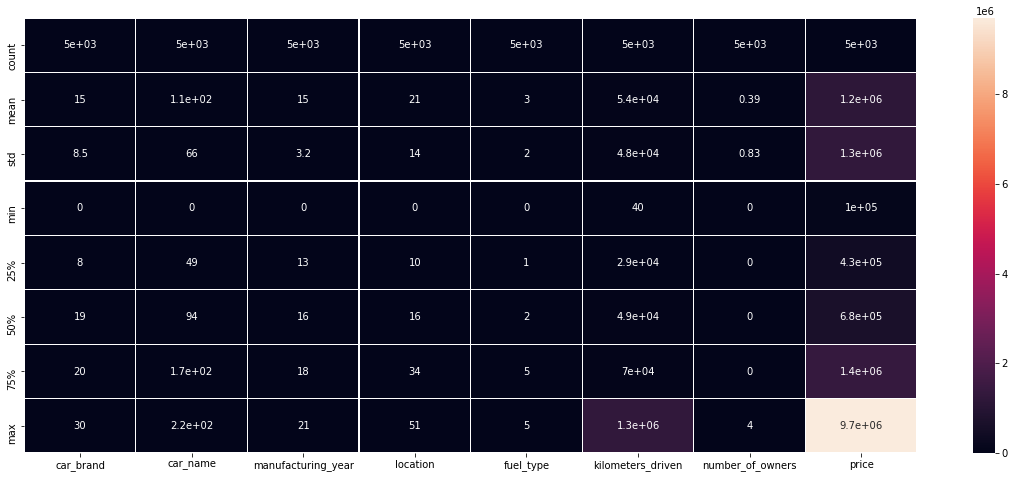

In [47]:
#describing the dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),annot=True,linewidths=0.2)

we can see the counts of all columns are same

standard deviations are comparably high that mean the data is scattered

most of the columns min value is 0 except price and kilometers driven



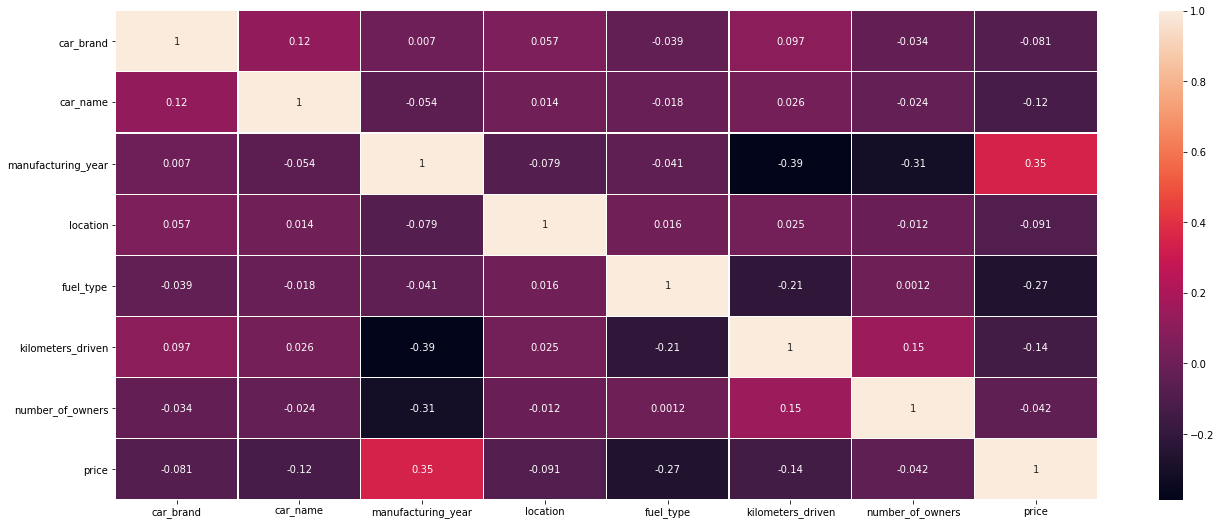

In [48]:
#making heatmap to check the correlations
plt.figure(figsize=(22,9))
sns.heatmap(df.corr(),annot=True,linewidths=0.2)
plt.show()

there is not much strong correlation of target and independent variable

even some variables have negative correlation

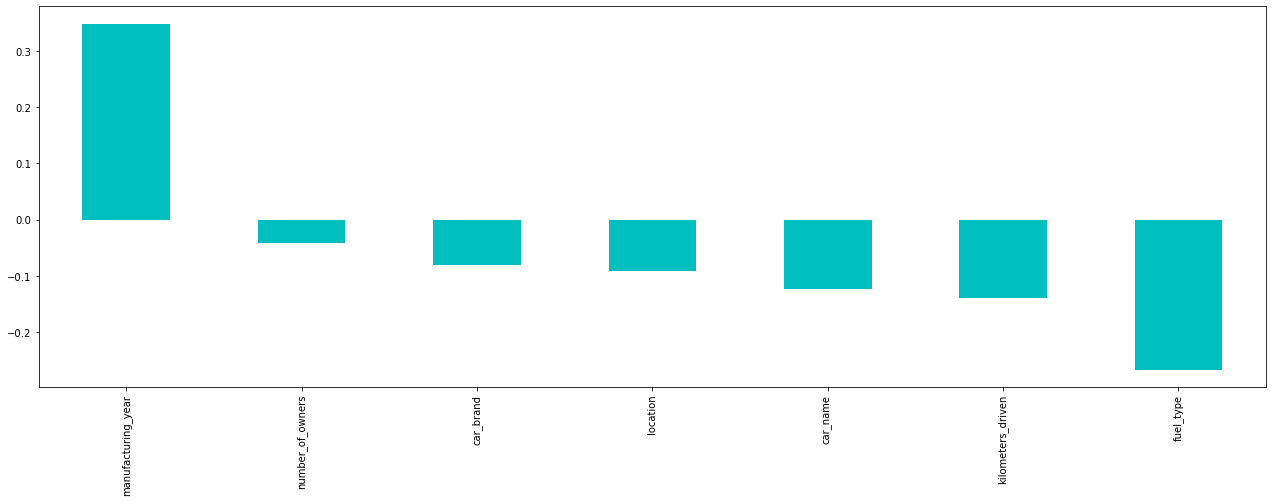

In [49]:
#Plotting Correlation in order with the target variable
plt.figure(figsize=(22,7))
df.corr()['price'].sort_values(ascending=False).drop(['price']).plot(kind='bar',color='c')
plt.show()

only mmanufacturing year have the positive relationship with the price in the dataset

car_brand


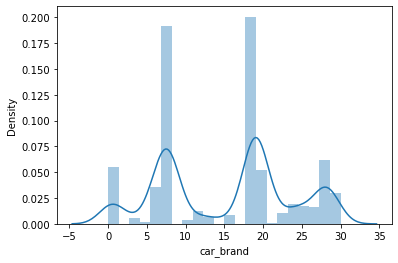

car_name


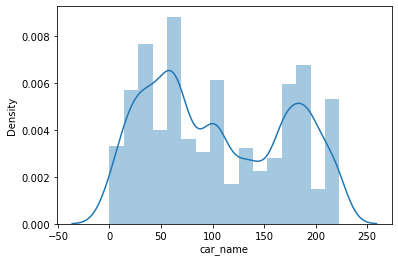

manufacturing_year


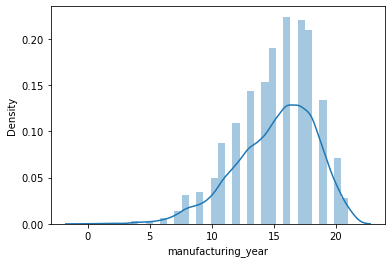

location


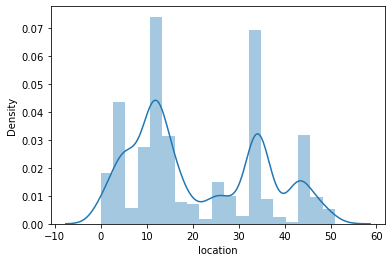

fuel_type


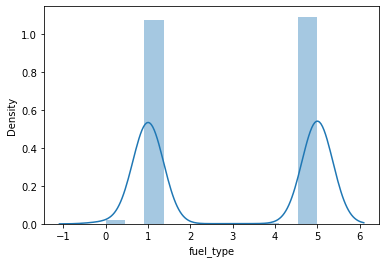

kilometers_driven


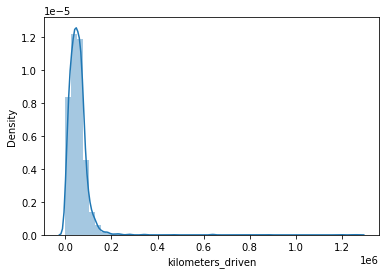

number_of_owners


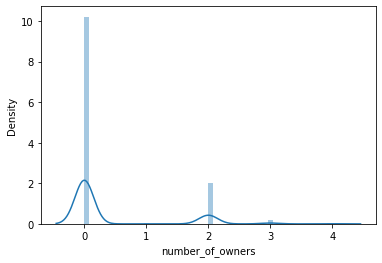

price


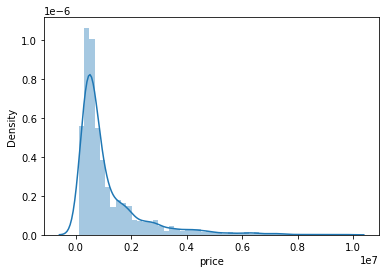

In [50]:
#checking for skewness in the columns by plloting bar
for columns in df:
    print(columns)
    sns.distplot(df[columns])
    plt.show()

there is only some columns have skewness

In [51]:
df.skew()

car_brand             -0.051796
car_name               0.222622
manufacturing_year    -0.675572
location               0.377287
fuel_type             -0.002789
kilometers_driven     11.773052
number_of_owners       1.840824
price                  2.692995
dtype: float64

In [52]:
# removing outliers
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
df_new= df[(z<3).all(axis = 1)]

In [53]:
#splitting the targeted variable
x=df.drop('price',axis=1)
y=df['price']

In [54]:
#scalling the data using standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(df)
x

array([[ 0.43946497, -0.99684235,  0.26002543, ..., -0.1739297 ,
        -0.46363687, -0.6549911 ],
       [-0.97139098,  0.22347837, -0.05183128, ..., -0.23423476,
        -0.46363687, -0.46064402],
       [ 0.43946497,  1.02195983, -1.92297154, ...,  0.3243476 ,
        -0.46363687, -0.66921162],
       ...,
       [ 1.14489294,  0.99182845, -0.05183128, ...,  0.06808236,
        -0.46363687,  0.01337325],
       [-0.97139098,  0.22347837, -0.05183128, ...,  0.42232769,
        -0.46363687, -0.52779646],
       [ 0.43946497, -0.98177667, -0.05183128, ...,  0.43360102,
        -0.46363687, -0.36268045]])

# model building

In [55]:
#importing libraries for model training
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [57]:
#train the model
from sklearn.linear_model import LinearRegression

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    accu=r2_score(y_test,pred)
    if accu>maxAccu:
        maxAccu = accu
        maxRS =i
print('best accuracy score is ',maxAccu,'random state is ',i) 

best accuracy score is  1.0 random state is  199


In [58]:
#splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=199)

In [59]:
#getting the MAE,MSE,RMSE for linear model
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error: 1.1336694648168211e-09
Mean squared error: 1.933593527954184e-18
Root Mean squared error: 1.3905371364886966e-09


In [60]:
#getting the r2 score for our model
print('r2 score is:',r2_score(y_test,pred))

r2 score is: 1.0


In [61]:
#cross validation of linear regression 
from sklearn.model_selection import cross_val_score

cvs=cross_val_score(lr,x,y,cv=5)
print('cross validation score is :',cvs.mean())

cross validation score is : 1.0


# random forest regressor

In [62]:
#getting best r2 score using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
print('r2_score is',rfr.score(x_train,y_train))
pred=rfr.predict(x_test)

r2_score is 0.9999832963029573


In [63]:
#cross validation of the best r2 score

cvs=cross_val_score(rfr,x,y,cv=5)
print('cross val score is ',cvs.mean())

cross val score is  0.9996391989501049


# Decision Tree Regressor

In [64]:
#getting best r2 score using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print('r2_score is',dtr.score(x_train,y_train))
pred=dtr.predict(x_test)

r2_score is 1.0


In [65]:
#cross validation of the best r2 score
cvs=cross_val_score(dtr,x,y,cv=5)
print('cross val score is ',cvs.mean())

cross val score is  0.9994088279271359


# ada boost regressor

In [67]:
#getting best r2 score using ada boost regressor
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
print('r2_score is',ada.score(x_train,y_train))
pred=ada.predict(x_test)

r2_score is 0.9904569211864629


In [68]:
#cross validation of the best r2 score
cvs=cross_val_score(ada,x,y,cv=5)
print('cross val score is ',cvs.mean())

cross val score is  0.9887473839047966


we consider decision tree regressor because it gives us the best r2 score and cross val score

# saving the model

In [69]:
#saving the model
import joblib
joblib.dump(dtr,'car_price_pred.pkl')

['car_price_pred.pkl']

In [70]:
#loading the mode for prediction
model = joblib.load('car_price_pred.pkl')

In [71]:
#loading the data
pred = model.predict(x_test)

In [75]:
#displaying predicted and actual prices
print("predicted car price: ",pred)
print('actual car price: ',y_test)

predicted car price:  [ 550000. 1200000.  351000. ... 2400000.  339000.  230000.]
actual car price:  1997     550000.0
4969    1200000.0
108      351000.0
670     2095000.0
641      961000.0
          ...    
1896     975000.0
1698    2550000.0
4492    2400000.0
2652     339000.0
275      230000.0
Name: price, Length: 1508, dtype: float64


In [73]:
pred

array([ 550000., 1200000.,  351000., ..., 2400000.,  339000.,  230000.])